# Entregable 1 - Data Engineering & Preprocessing

**Proyecto:** Limpieza y Preprocesado de Datos para Predicción de Precios  
**Dataset:** bmw_pricing_v3.csv  
**Objetivo:** Preparar datos para modelo de Machine Learning  
**Integrante:** Alexis Labrador  
**Fecha:** Noviembre 2025

---

## 1. IMPORTS Y CONFIGURACIÓN

### 1.1 Configuración para Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.2 Importar librerías

In [ ]:
import sys
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

pd.set_option('display.width', 1000)

BASE_PATH = "/content/drive/MyDrive/Nuclio Master/Entregable 1"
FILE_PATH = f"{BASE_PATH}/data/processed"

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


---

## 2. CARGA DE DATOS

In [4]:
# Cargar el dataset
df = pd.read_csv(f'{BASE_PATH}/bmw_pricing_v3.csv')

print(f"✓ Dataset cargado exitosamente")
print(f"  Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas\n")
print(df)

✓ Dataset cargado exitosamente
  Dimensiones: 4,843 filas × 18 columnas

     marca             modelo        km  potencia fecha_registro tipo_gasolina   color   tipo_coche volante_regulable aire_acondicionado camara_trasera asientos_traseros_plegables elevalunas_electrico bluetooth   gps alerta_lim_velocidad   precio fecha_venta
0      NaN                118  140411.0     100.0     2012-02-01        diesel   black          NaN              True               True          False                         NaN                 True       NaN  True                  NaN  11300.0  2018-01-01
1      BMW                 M4   13929.0     317.0            NaN        petrol    grey  convertible              True               True          False                         NaN                False      True  True                 True  69700.0  2018-02-01
2      BMW                320  183297.0     120.0     2012-04-01        diesel   white          NaN             False              False          Fals

---

## 3. ANÁLISIS EXPLORATORIO INICIAL (información general, estadísticas descriptivas y análisis de tipos de datos)

In [5]:
print("=" * 80, "\nINFORMACIÓN DEL DATASET\n" + "=" * 80, "\n")
df.info()
print("\n")

print("\n" + "=" * 80, "\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS\n" + "=" * 80, "\n")
display(df.describe().T)
print("\n")

print("\n" + "=" * 80, "\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS\n" + "=" * 80, "\n")
display(df.describe(include=['object']).T)
print("\n")


INFORMACIÓN DEL DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0





ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS



,count,unique,top,freq
marca,3873,1,BMW,3873
modelo,4840,76,320,752
fecha_registro,2420,180,2013-07-01,93
tipo_gasolina,4838,5,diesel,4631
color,4398,10,black,1499
tipo_coche,3383,8,estate,1107
volante_regulable,4839,2,True,2662
aire_acondicionado,4357,2,True,3465
camara_trasera,4841,2,False,3864
asientos_traseros_plegables,1452,2,False,1150


---

## 4. ANÁLISIS DE CALIDAD DE DATOS

### 4.1 Análisis de duplicados

ANÁLISIS DE REGISTROS DUPLICADOS

DUPLICADOS COMPLETOS (todas las columnas):
 - Total: 0 registros (0.00%)
No se encontraron registros duplicados

DUPLICADOS POR COLUMNA CLAVE: ['modelo', 'km', 'potencia', 'precio', 'fecha_venta']
  Total: 0 registros (0.00%)

VALORES DUPLICADOS POR COLUMNA:


,Columna,Total,Únicos,Duplicados,Porcentaje
0,marca,4843,1,4842,99.979352
8,volante_regulable,4843,2,4841,99.958703
13,bluetooth,4843,2,4841,99.958703
9,aire_acondicionado,4843,2,4841,99.958703
15,alerta_lim_velocidad,4843,2,4841,99.958703
14,gps,4843,2,4841,99.958703
11,asientos_traseros_plegables,4843,2,4841,99.958703
12,elevalunas_electrico,4843,2,4841,99.958703
10,camara_trasera,4843,2,4841,99.958703
5,tipo_gasolina,4843,5,4838,99.896758


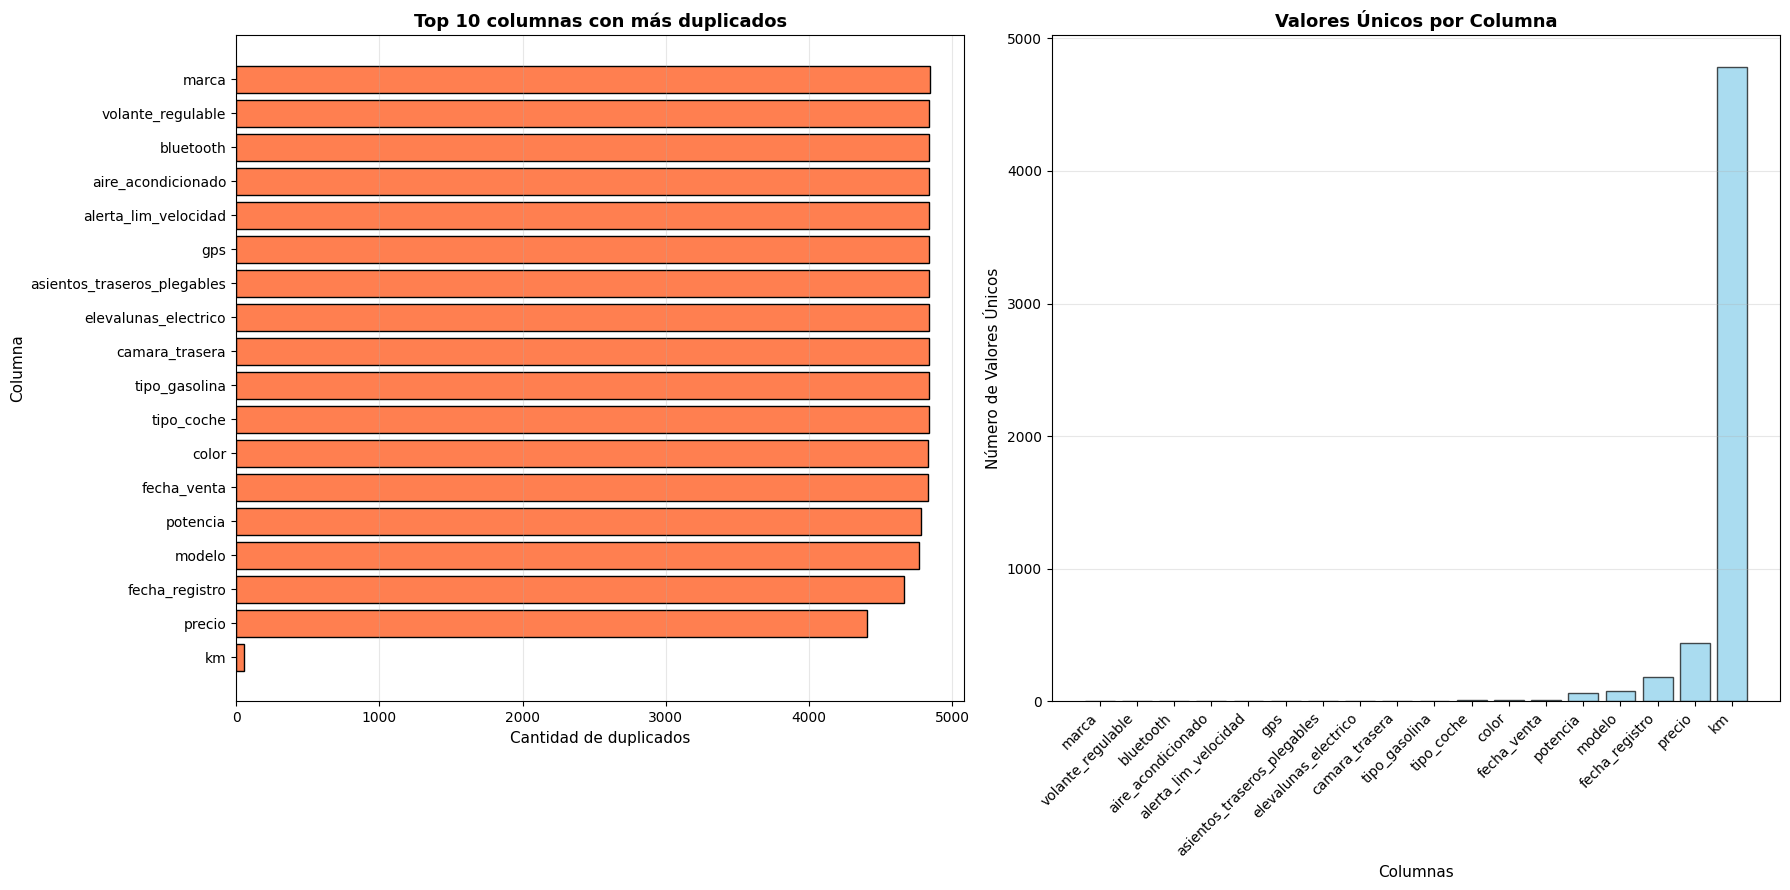

In [6]:
def graphing_duplicates_values(df: pd.DataFrame) -> None:
    """
      Visualiza los valores duplicados en el dataset

      Args:
        df: Dataset con valores duplicados
    """
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))

    # Gráfico 1: Top 10 columnas con más duplicados
    axes[0].barh(df['Columna'], df['Duplicados'], color='coral', edgecolor='black')
    axes[0].set_xlabel('Cantidad de duplicados', fontsize=11)
    axes[0].set_ylabel('Columna', fontsize=11)
    axes[0].set_title('Top 10 columnas con más duplicados', fontsize=13, fontweight='bold')
    axes[0].grid(alpha=0.3, axis='x')
    axes[0].invert_yaxis()

    # Gráfico 2: Distribución de valores únicos
    axes[1].bar(range(len(df)), df['Únicos'], color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].set_xlabel('Columnas', fontsize=11)
    axes[1].set_ylabel('Número de Valores Únicos', fontsize=11)
    axes[1].set_title('Valores Únicos por Columna', fontsize=13, fontweight='bold')
    axes[1].set_xticks(range(len(df)))
    axes[1].set_xticklabels(df['Columna'], rotation=45, ha='right')
    axes[1].grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()


def analyze_duplicates(df: pd.DataFrame) -> dict:
    """
        Analiza registros duplicados en el dataset

        Args:
            df: Dataset a analizar

        Returns:
            Información sobre duplicados
    """
    # Duplicados completos (todas las columnas)
    df_dupl_complete = df.duplicated().sum()
    percentage_complete = (df_dupl_complete / len(df)) * 100

    print(f"DUPLICADOS COMPLETOS (todas las columnas):")
    print(f" - Total: {df_dupl_complete:,} registros ({percentage_complete:.2f}%)")

    if df_dupl_complete > 0:
        print(f"\nPrimeros duplicados encontrados:")
        df_duplicate = df[df.duplicated(keep=False)].sort_values(
            by=list(df.columns)
        )
        display(df_duplicate.head(10))
    else:
        print("No se encontraron registros duplicados")

    # Duplicados por columnas clave
    key_columns = ['modelo', 'km', 'potencia', 'precio', 'fecha_venta']
    existing_col = [col for col in key_columns if col in df.columns]

    if existing_col:
        print(f"\nDUPLICADOS POR COLUMNA CLAVE: {existing_col}")
        key_duplicate = df.duplicated(subset=existing_col).sum()
        key_percent = (key_duplicate / len(df)) * 100
        print(f"  Total: {key_duplicate:,} registros ({key_percent:.2f}%)")

        if key_duplicate > 0:
            print(f"\n  Ejemplos de duplicados por columnas clave:")
            df_key_duplicate = df[
                df.duplicated(subset=existing_col, keep=False)
            ].sort_values(by=existing_col)
            display(df_key_duplicate.head(10))

    # Análisis por columna individual
    print(f"\nVALORES DUPLICADOS POR COLUMNA:")
    result_columns = list()

    for col in df.columns:
        total_val = len(df[col])
        unique_val = df[col].nunique()
        duplicate_val = total_val - unique_val
        percent_val = (duplicate_val / total_val) * 100

        result_columns.append({
            'Columna': col,
            'Total': total_val,
            'Únicos': unique_val,
            'Duplicados': duplicate_val,
            'Porcentaje': percent_val
        })

    df_results_duplicates = pd.DataFrame(result_columns).sort_values(
        'Porcentaje', ascending=False
    )
    display(df_results_duplicates)
    print("\n")

    graphing_duplicates_values(df_results_duplicates)

    return {
        'duplicados_completos': df_dupl_complete,
        'porcentaje_completos': percentage_complete,
        'duplicados_clave': key_duplicate if existing_col else 0
    }


print("=" * 50, "\nANÁLISIS DE REGISTROS DUPLICADOS\n" + "=" * 50, "\n")
info_duplicates = analyze_duplicates(df)

### 4.2 Valores nulos

VALORES NULOS POR COLUMNA



,Columna,Nulos,Porcentaje
11,asientos_traseros_plegables,3391,70.018584
4,fecha_registro,2423,50.030973
7,tipo_coche,1460,30.146603
0,marca,970,20.028908
13,bluetooth,728,15.032005
15,alerta_lim_velocidad,728,15.032005
9,aire_acondicionado,486,10.035102
6,color,445,9.188520
16,precio,6,0.123890
5,tipo_gasolina,5,0.103242


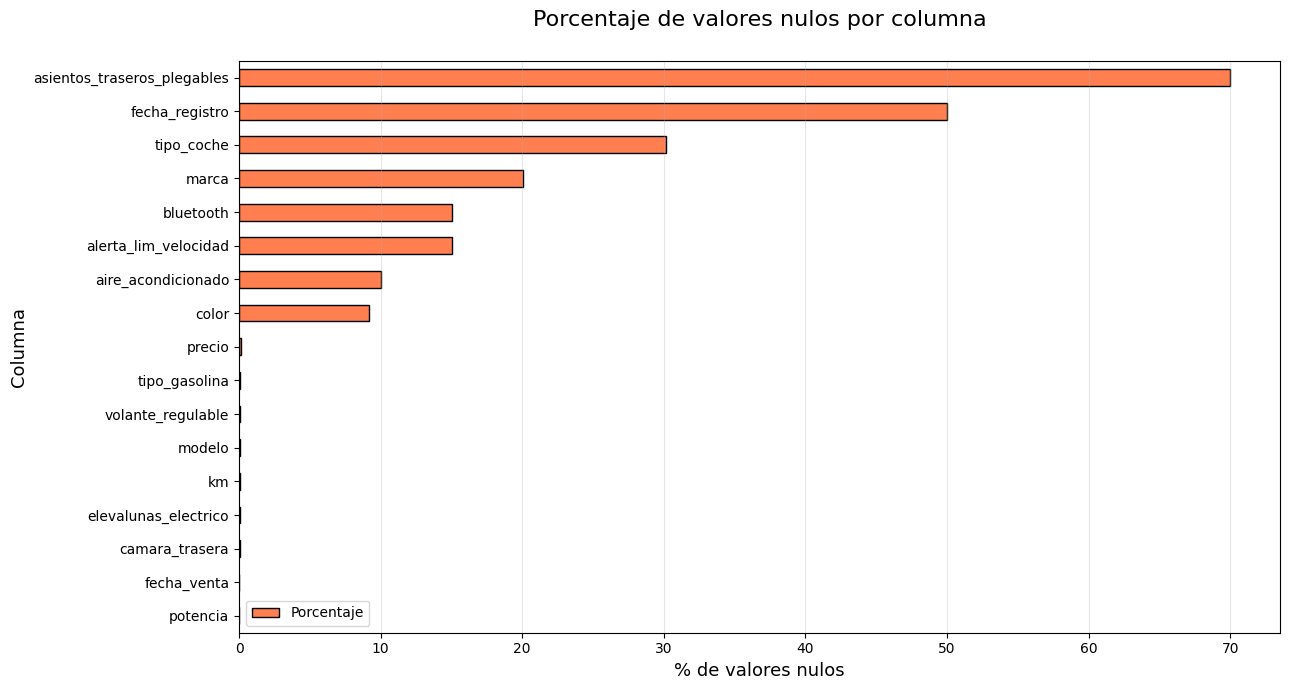

In [7]:
def graphing_null_values(df_nulls: pd.DataFrame) -> None:
    """
      Visualiza los valores nulos en el dataset

      Args:
        df: Dataset con valores nulos
    """
    if len(df_nulls) > 0:
        fig, ax = plt.subplots(figsize=(13, 7))
        df_nulls.sort_values('Porcentaje', ascending=True).plot(
            x='Columna',
            y='Porcentaje',
            kind='barh',
            ax=ax,
            color='coral',
            edgecolor='black'
        )
        ax.set_xlabel('% de valores nulos', fontsize=13)
        ax.set_ylabel('Columna', fontsize=13)
        ax.set_title('Porcentaje de valores nulos por columna', fontsize=16, pad=25)
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print("No hay valores nulos en el dataset")


def analyze_null_values(df: pd.DataFrame) -> pd.DataFrame:
    """
      Analiza y visualiza los valores nulos en el dataset

      Args:
        df: Dataset a analizar

      Returns:
        Tabla con conteo y porcentaje de nulos
    """
    data_nulls = df.isnull().sum()
    porcentaje_nulos = (data_nulls / len(df)) * 100

    table_nulls = pd.DataFrame({
        'Columna': data_nulls.index,
        'Nulos': data_nulls.values,
        'Porcentaje': porcentaje_nulos.values
    })

    table_nulls = table_nulls[table_nulls['Nulos'] > 0].sort_values('Nulos', ascending=False)

    print("=" * 50, "\nVALORES NULOS POR COLUMNA\n" + "=" * 50, "\n")
    display(table_nulls)
    print("\n\n")

    return table_nulls


# Analizar nulos
table_nulls = analyze_null_values(df)

# Visualización de los valors nulos en el dataset
graphing_null_values(table_nulls)

### 4.3 Valores inconsistentes

In [8]:
def detect_anomalies(df: pd.DataFrame) -> dict:
    """
      Detecta valores anómalos en el dataset (Km, potencia y precio)

      Args:
        df: Dataset a analizar

      Returns:
        Diccionario con anomalías detectadas
    """
    anomalias = dict()

    # KM negativos
    if 'km' in df.columns:
        km_negativos = (df['km'] < 0).sum()
        if km_negativos > 0:
            anomalias['km_negativos'] = km_negativos

    # Campos que deben ser > 0
    campos_pos = {
        'potencia': 'potencia_invalida',
        'precio': 'precios_invalidos'
    }

    for col, key in campos_pos.items():
        if col in df.columns:
            invalidos = (df[col] <= 0).sum()
            if invalidos > 0:
                anomalias[key] = invalidos

    return anomalias


# Detectar anomalías
anomalias = detect_anomalies(df)

print("=" * 80, "\nDETECCIÓN DE VALORES ANÓMALOS\n" + "=" * 80, "\n")

if anomalias:
    for tipo, cantidad in anomalias.items():
        print(f"  {tipo}: {cantidad} {'registro' if cantidad == 1 else 'registros'}")
else:
    print("No se detectaron anomalías evidentes")
print("\n")

DETECCIÓN DE VALORES ANÓMALOS

  km_negativos: 1 registro
  potencia_invalida: 1 registro




### 4.4 Análisis de la variable objetivo/Target (Precio)

ANÁLISIS DE LA VARIABLE OBJETIVO: PRECIO

Estadísticas descriptivas:
 Count: 4,837
 Media: 15831.92€
 Mediana: 14200.00€
 Moda: 13100.00€
 Desv. Std: 9222.63€
 Mínimo: 100.00€
 Máximo: 178500.00€

Cuartiles:
 Q1 (25%): 10800.00€
 Q2 (50%): 14200.00€
 Q3 (75%): 18600.00€
 IQR: 7800.00€

Asimetría y Curtosis:
 Skewness: 3.3248
 Kurtosis: 32.7825

Outliers (método IQR):
 Total: 311 (6.42%)
 Límite inferior: -900.00€
 Límite superior: 30300.00€




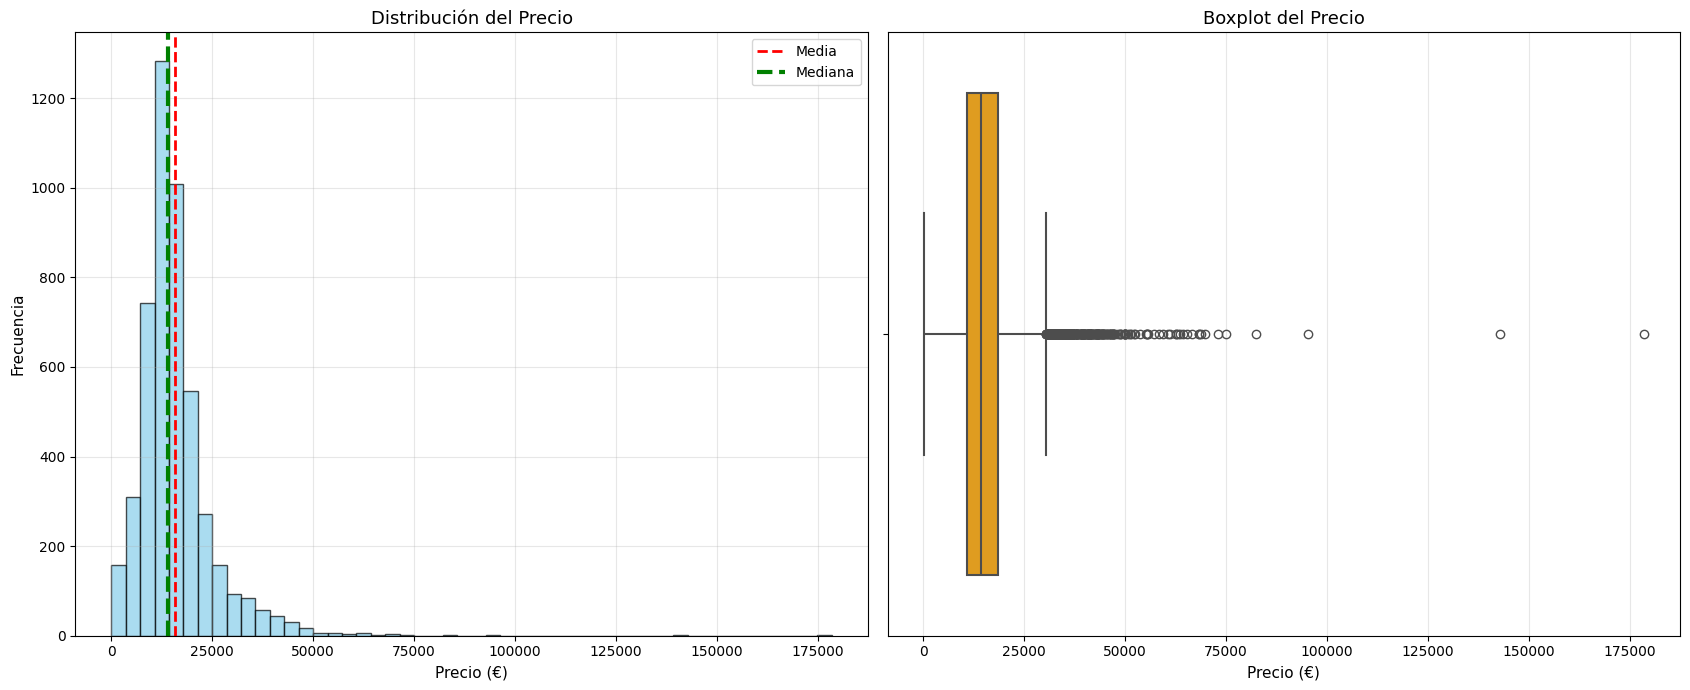

In [9]:
def calculate_quartiles(df: pd.DataFrame, column_name: str = 'precio') -> tuple:
    """
      Calcula los cuartiles del dataset

      Args:
        df: Dataset a analizar
        column_name: Nombre de la columna objetivo o target
    """
    # Cuartiles (IQR: Rango Intercuartílico, dispersión de los datos centrales)
    Q1 = df[column_name].quantile(0.25)
    Q2 = df[column_name].quantile(0.50)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    return Q1, Q2, Q3, IQR


def graphing_target_variable(df: pd.DataFrame, column_name: str = 'precio') -> None:
    """
      Visualiza los valores del target en el dataset

      Args:
        df: Dataset a analizar
        column_name: Nombre de la columna objetivo o target
    """
    # Visualización
    fig, ax = plt.subplots(1, 2, figsize=(17, 7))

    # Histograma
    ax[0].hist(df[column_name], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Media')
    ax[0].axvline(df[column_name].median(), color='green', linestyle='--', linewidth=3, label='Mediana')
    ax[0].set_xlabel('Precio (€)', fontsize=11)
    ax[0].set_ylabel('Frecuencia', fontsize=11)
    ax[0].set_title('Distribución del Precio', fontsize=13)
    ax[0].legend()
    ax[0].grid(alpha=0.3)

    # Boxplot
    sns.boxplot(x=df[column_name], ax=ax[1], color='orange', linewidth=1.5)
    ax[1].set_xlabel('Precio (€)', fontsize=11)
    ax[1].set_title('Boxplot del Precio', fontsize=13)
    ax[1].grid(alpha=0.3, axis='x')

    plt.tight_layout()
    plt.show()


def analyze_target_variable(df: pd.DataFrame, column_name: str = 'precio'):
    """
        Analiza la variable objetivo o target del dataset

        Args:
            df: Dataset a analizar
            column_name: Nombre de la columna objetivo o target
    """
    print("=" * 50, f"\nANÁLISIS DE LA VARIABLE OBJETIVO: {column_name.upper()}\n" + "=" * 50)

    # Estadísticas
    print(f"\nEstadísticas descriptivas:")
    print(f" Count: {df[column_name].count():,}")
    print(f" Media: {df[column_name].mean():.2f}€")
    print(f" Mediana: {df[column_name].median():.2f}€")
    print(f" Moda: {df[column_name].mode()[0]:.2f}€")
    print(f" Desv. Std: {df[column_name].std():.2f}€")
    print(f" Mínimo: {df[column_name].min():.2f}€")
    print(f" Máximo: {df[column_name].max():.2f}€")

    # Calcula los cuartiles
    q1, q2, q3, iqr = calculate_quartiles(df)

    print(f"\nCuartiles:")
    print(f" Q1 (25%): {q1:.2f}€")
    print(f" Q2 (50%): {q2:.2f}€")
    print(f" Q3 (75%): {q3:.2f}€")
    print(f" IQR: {iqr:.2f}€")

    # Skewness y Kurtosis
    skewness = df[column_name].skew()       # Asimetría de la distribución (Positiva > 0: cola a la derecha / Negativa < 0: cola a la izquierda)
    kurtosis = df[column_name].kurtosis()   # Distribución tiene cola pesada (Leptocúrtica > 0: muchos outliers) o cola ligera (Platicúrtica < 0: pocos outliers)

    print(f"\nAsimetría y Curtosis:")
    print(f" Skewness: {skewness:.4f}")
    print(f" Kurtosis: {kurtosis:.4f}")

    # Outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    print(f"\nOutliers (método IQR):")
    print(f" Total: {len(outliers)} ({(len(outliers)/len(df)) * 100:.2f}%)")
    print(f" Límite inferior: {lower_bound:.2f}€")
    print(f" Límite superior: {upper_bound:.2f}€")
    print("\n")

    # Visualización de histograma y Boxplot
    graphing_target_variable(df)


analyze_target_variable(df)

---

## 5. LIMPIEZA DE DUPLICADOS

In [32]:
def remove_duplicates(df: pd.DataFrame, subset_var: list = None, keep_var: str = 'first') -> pd.DataFrame:
    """
        Elimina registros duplicados del dataset

        Args:
            df: Dataset a analizar
            subset_var: Columnas a considerar para duplicados (None = todas)
            keep_var: 'first', 'last' o False (eliminar todos)

        Returns:
            Dataset sin duplicados
    """
    print("=" * 50, f"\nLIMPIEZA DE DUPLICADOS\n" + "=" * 50)

    total_row_init = len(df)

    if subset_var:
        print(f"\nEliminando duplicados considerando columnas: {subset_var}")
    else:
        print(f"\nEliminando duplicados por todas las columnas")

    # Eliminar duplicados
    df_no_duplicates = df.drop_duplicates(subset=subset_var, keep=keep_var)

    total_row_end = len(df_no_duplicates)
    row_removed = total_row_init - total_row_end
    percentage_removed = (row_removed / total_row_init) * 100

    print(f"\nRESULTADO:")
    print(f" - Filas antes: {total_row_init:,}")
    print(f" - Filas después: {total_row_end:,}")
    print(f" - Filas eliminadas: {row_removed:,} ({percentage_removed:.2f}%)")
    print(f" - Datos retenidos: {(total_row_end / total_row_init) * 100:.2f}%")

    return df_no_duplicates


# Eliminar duplicados completos (si existen)
if info_duplicates['duplicados_completos'] > 0:
    df_no_duplicates = remove_duplicates(df, subset=None, keep='first')
else:
    df_no_duplicates = df.copy()
    print("\nNo hay duplicados completos que eliminar\n")


No hay duplicados completos que eliminar



---

## 6. TRATAMIENTO DE VALORES NULOS

### 6.1 Análisis de patrones

CORRELACIÓN ENTRE NULOS DE DIFERENTES VARIABLES

MATRIZ DE CORRELACIÓN DE NULOS (1 = nulos aparecen siempre juntos, 0 = independientes, -1 = mutuamente excluyentes):

No se detectaron correlaciones fuertes entre nulos -> Los nulos parecen ser independientes entre variables



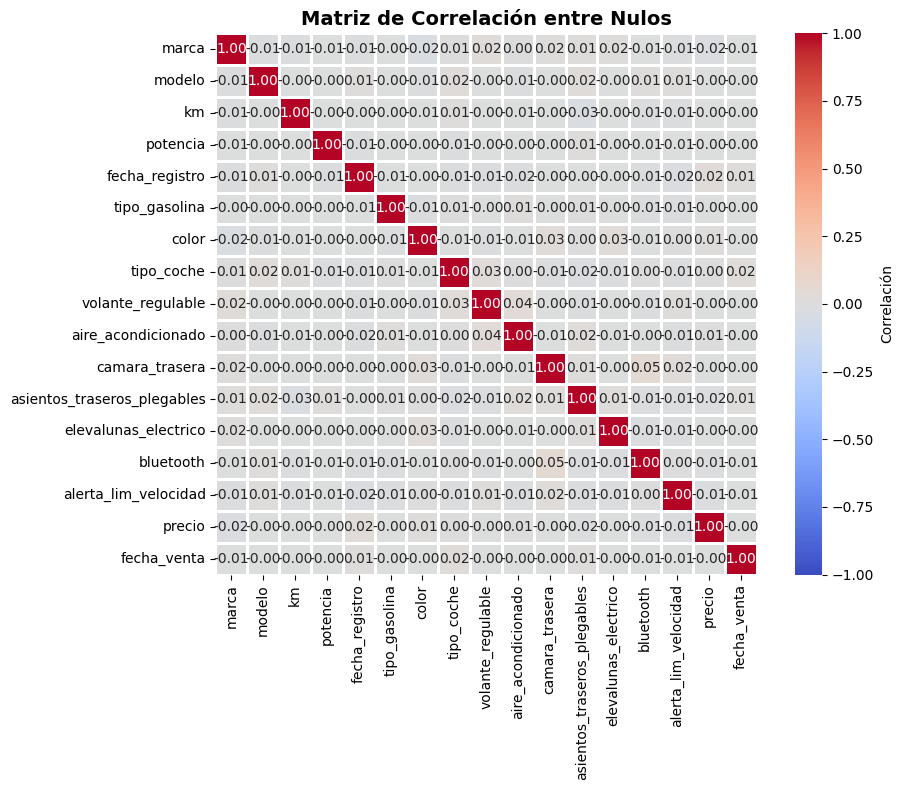

In [33]:
def analyze_correlation_nulls(df: pd.DataFrame):
    """
        Analiza si los nulos de diferentes variables están correlacionados

        Interpretación:
            r > 0.7 -> Los nulos aparecen JUNTOS frecuentemente
              Acción: Imputar juntos o eliminar juntos

            r ≈ 0 -> Los nulos son INDEPENDIENTES
              Acción: Tratar cada variable por separado

            r < -0.5 -> Los nulos son MUTUAMENTE EXCLUYENTES
              Acción: Usar una variable para imputar la otra

        Args:
            df: Dataset a analizar
    """
    print("=" * 50, f"\nCORRELACIÓN ENTRE NULOS DE DIFERENTES VARIABLES\n" + "=" * 50, "\n")

    # Crear matriz binaria de nulos
    null_array = df.isnull().astype(int)

    # Solo columnas con nulos
    cols_nulls = null_array.sum()[null_array.sum() > 0].index.tolist()

    if len(cols_nulls) < 2:
        print("Menos de 2 columnas con nulos. No se puede calcular correlación.")
        return

    df_nulls_filtered = null_array[cols_nulls]

    # Calcular correlación entre presencia de nulos
    null_correlation = df_nulls_filtered.corr()

    print(f"MATRIZ DE CORRELACIÓN DE NULOS (1 = nulos aparecen siempre juntos, 0 = independientes, -1 = mutuamente excluyentes):")

    # Encontrar correlaciones fuertes (|r| > 0.5, excluyendo diagonal)
    np.fill_diagonal(null_correlation.values, 0)        # Ignora la diagonal
    strong_correlations = list()

    for idx in range(len(null_correlation)):
        for j in range(idx + 1, len(null_correlation)):
            corr = null_correlation.iloc[idx, j]
            if abs(corr) > 0.5:
                strong_correlations.append({
                    'Variable 1': null_correlation.index[idx],
                    'Variable 2': null_correlation.columns[j],
                    'Correlación': corr
                })

    if strong_correlations:
        print(f"\nCORRELACIONES FUERTES DETECTADAS (|r| > 0.5):")
        df_corr = pd.DataFrame(strong_correlations).sort_values('Correlación', ascending=False)
        display(df_corr)

        print(f"\nINTERPRETACIÓN:")
        for _, row in df_corr.iterrows():
            var1, var2, corr = row['Variable 1'], row['Variable 2'], row['Correlación']

            if corr > 0.7:
                print(f" • {var1} y {var2}: Nulos aparecen JUNTOS (r = {corr:.3f}) -> Posible patrón sistemático (ej: filas incompletas)")

            elif corr < -0.5:
                print(f" • {var1} y {var2}: Nulos mutuamente excluyentes (r = {corr:.3f}) -> Posible grupo alternativo")

    else:
        print("\nNo se detectaron correlaciones fuertes entre nulos -> Los nulos parecen ser independientes entre variables\n")

    # Visualizar matriz de correlación
    fig, ax = plt.subplots(figsize=(10, 8))

    # Restaurar diagonal para visualización
    np.fill_diagonal(null_correlation.values, 1)

    sns.heatmap(
        null_correlation,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=1,
        cbar_kws={'label': 'Correlación'},
        vmin=-1,
        vmax=1,
        ax=ax
    )
    ax.set_title('Matriz de Correlación entre Nulos', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


analyze_correlation_nulls(df_no_duplicates)

### 6.2 Estrategia de imputación

In [34]:
def define_imputation_strategy(df: pd.DataFrame, anomalias: dict = None):
    """
        Define y documenta la estrategia de imputación para cada variable con nulos

        Args:
            df: Dataset a analizar sin duplicados
    """
    print("=" * 60, "\nESTRATEGIA DE IMPUTACIÓN DE VALORES NULOS\n" + "=" * 60, "\n")

    total_rows = len(df)

    print(f"DATASET: {total_rows:,} filas")
    print(f"VARIABLE OBJETIVO: precio")
    print(f"Sin duplicados completos")
    print(f"Valores anómalos: 1 km negativo, 1 potencia inválida")
    print(f"{'─' * 60}\n")

    analyze_null_values(df)

    def _calculate_column_info(df: pd.DataFrame, column_name: str) -> dict:
        """
            Calcula información dinámica de una columna
        """
        info = dict()

        # Valores nulos
        info['nulos'] = int(df[column_name].isnull().sum())
        info['porcentaje'] = round((info['nulos'] / len(df)) * 100, 2)

        # Valores únicos
        info['valores_unicos'] = int(df[column_name].nunique())

        # Duplicados (total - únicos)
        info['duplicados'] = len(df) - info['valores_unicos']
        info['porcentaje_duplicados'] = round((info['duplicados'] / len(df)) * 100, 2)

        return info

    # Diccionario de estrategias
    strategies_dict = dict()

    # Grupo 1: Eliminar filas (variables críticas)

    # MODELO
    if 'modelo' in df.columns:
        info = _calculate_column_info(df, 'modelo')
        strategies_dict['modelo'] = {
            **info,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["modelo"])',
            'justificacion': f'Variable CRÍTICA para predicción. {info["valores_unicos"]} modelos únicos con alta variabilidad de precio.',
            'criticidad': 'CRÍTICA',
            'impacto': f'Mínimo ({info["nulos"]} filas = {info["porcentaje"]}%)'
        }

    # KM
    if 'km' in df.columns:
        info = _calculate_column_info(df, 'km')

        # Detectar km negativos
        km_negativos = int((df['km'] < 0).sum())

        strategies_dict['km'] = {
            **info,
            'anomalos': km_negativos,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["km"]) + eliminar km < 0',
            'justificacion': f'Variable numérica ESENCIAL. {km_negativos} valor(es) negativo(s) anómalo(s).',
            'criticidad': 'ALTA',
            'impacto': f'Mínimo ({info["nulos"]} nulos + {km_negativos} negativos = {info["nulos"] + km_negativos} filas)',
            'nota': f'{info["valores_unicos"]:,} valores únicos ({(info["valores_unicos"]/len(df)) * 100:.2f}%) -> Variable casi continua'
        }

    # POTENCIA
    if 'potencia' in df.columns:
        info = _calculate_column_info(df, 'potencia')

        # Detectar potencia inválida (<=0) dinámicamente
        invalid_power = int((df['potencia'] <= 0).sum())

        strategies_dict['potencia'] = {
            **info,
            'anomalos': invalid_power,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["potencia"]) + eliminar potencia <= 0',
            'justificacion': f'Predictor MÁS IMPORTANTE. Potencia ≤ 0 es imposible.',
            'criticidad': 'CRÍTICA',
            'impacto': f'Mínimo ({info["nulos"]} nulos + {invalid_power} inválidos = {info["nulos"] + invalid_power} filas)'
        }

    # TIPO_GASOLINA
    if 'tipo_gasolina' in df.columns:
        info = _calculate_column_info(df, 'tipo_gasolina')

        strategies_dict['tipo_gasolina'] = {
            **info,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["tipo_gasolina"])',
            'justificacion': f'Variable categórica importante. {info["valores_unicos"]} categorías únicas.',
            'criticidad': 'MEDIA-ALTA',
            'impacto': f'Bajo ({info["nulos"]} filas = {info["porcentaje"]}%)'
        }

    # PRECIO (TARGET)
    if 'precio' in df.columns:
        info = _calculate_column_info(df, 'precio')

        strategies_dict['precio'] = {
            **info,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["precio"])',
            'justificacion': f'Variable OBJETIVO (target). Sin precio no hay supervisión.',
            'criticidad': 'CRÍTICA',
            'impacto': f'Bajo ({info["nulos"]} filas) = {info["porcentaje"]}%)'
        }

    # FECHA_VENTA
    if 'fecha_venta' in df.columns:
        info = _calculate_column_info(df, 'fecha_venta')

        strategies_dict['fecha_venta'] = {
            **info,
            'estrategia': 'ELIMINAR FILAS',
            'metodo': 'df.dropna(subset=["fecha_venta"])',
            'justificacion': f'Necesaria para features temporales. {info["valores_unicos"]} fechas únicas.',
            'criticidad': 'MEDIA',
            'impacto': f'Mínimo ({info["nulos"]} filas = {info["porcentaje"]}%)'
        }

    # Grupo 2: Imputar con valor conocido

    # MARCA
    if 'marca' in df.columns:
        info = _calculate_column_info(df, 'marca')

        # Calcular valor más frecuente dinámicamente
        valor_conocido = df['marca'].mode()[0] if len(df['marca'].mode()) > 0 else 'BMW'

        strategies_dict['marca'] = {
            **info,
            'estrategia': 'IMPUTAR CON VALOR CONOCIDO',
            'metodo': f'df["marca"].fillna("{valor_conocido}")',
            'justificacion': f'Solo {info["valores_unicos"]} valor único. {info["porcentaje_duplicados"]:.2f}% de duplicados -> Todos los no-nulos son {valor_conocido}.',
            'criticidad': 'BAJA',
            'valor_imputacion': valor_conocido,
            'accion_posterior': 'Eliminar columna después (no aporta información)' if info['valores_unicos'] == 1 else None
        }

    # Grupo 3: Imputar con moda

    # COLOR
    if 'color' in df.columns:
        info = _calculate_column_info(df, 'color')

        # Calcular moda dinámicamente
        moda = df['color'].mode()[0] if len(df['color'].mode()) > 0 else None
        frecuencia_moda = (df['color'] == moda).sum()
        porcentaje_moda = (frecuencia_moda / len(df)) * 100

        strategies_dict['color'] = {
            **info,
            'estrategia': 'IMPUTAR CON MODA',
            'metodo': 'df["color"].fillna(df["color"].mode()[0])',
            'justificacion': f'{info["valores_unicos"]} colores únicos. Moda: {moda} ({porcentaje_moda:.2f}%).',
            'criticidad': 'BAJA',
            'valor_imputacion': moda,
            'impacto': 'Bajo - Color tiene poca correlación con precio'
        }

    # TIPO_COCHE
    if 'tipo_coche' in df.columns:
        info = _calculate_column_info(df, 'tipo_coche')

        # Calcular moda
        moda = df['tipo_coche'].mode()[0] if len(df['tipo_coche'].mode()) > 0 else None
        frecuencia_moda = (df['tipo_coche'] == moda).sum()
        porcentaje_moda = (frecuencia_moda / len(df)) * 100

        # Determinar si el % de nulos es alto
        precaucion = None
        if info['porcentaje'] > 25:
            precaucion = f"{info['porcentaje']:.1f}% de nulos es ALTO. Considerar crear categoría 'unknown'"

        strategies_dict['tipo_coche'] = {
            **info,
            'estrategia': 'IMPUTAR CON MODA',
            'metodo': 'df["tipo_coche"].fillna(df["tipo_coche"].mode()[0])',
            'justificacion': f'{info["valores_unicos"]} tipos únicos. Moda: {moda} ({porcentaje_moda:.2f}%).',
            'criticidad': 'MEDIA',
            'valor_imputacion': moda,
            'impacto': f'{"Moderado" if info["porcentaje"] > 20 else "Bajo"} - {info["porcentaje"]:.2f}% de nulos',
            'precaucion': precaucion
        }

    # Grupo 4: Imputar variables booleanas con 0

    variables_booleanas = [
        'volante_regulable',
        'aire_acondicionado',
        'camara_trasera',
        'asientos_traseros_plegables',
        'elevalunas_electrico',
        'bluetooth',
        'gps',
        'alerta_lim_velocidad'
    ]

    for var in variables_booleanas:
        if var in df.columns:
            info = _calculate_column_info(df, var)

            # Estrategia base
            est = {
                **info,
                'metodo': f'df["{var}"].fillna(0).astype(int)',
                'justificacion': 'Variable booleana. Nulo = No tiene la característica.',
                'criticidad': 'BAJA',
                'valor_imputacion': 0
            }

            # Casos especiales
            if info['nulos'] == 0:
                est['estrategia'] = 'SIN NULOS'
                est['metodo'] = 'No requiere imputación'
                est['justificacion'] = 'Variable completa sin valores nulos.'
                est['criticidad'] = 'COMPLETA'
            else:
                est['estrategia'] = 'IMPUTAR CON 0'

                # Impacto según % de nulos
                if info['porcentaje'] < 1:
                    est['impacto'] = f'Mínimo ({info["nulos"]} valores)'
                elif info['porcentaje'] < 15:
                    est['impacto'] = f'Bajo ({info["nulos"]:,} valores = {info["porcentaje"]:.2f}%)'
                else:
                    est['impacto'] = f'Moderado ({info["nulos"]:,} valores = {info["porcentaje"]:.2f}%)'

                # Notas especiales para variables específicas
                if var == 'asientos_traseros_plegables' and info['porcentaje'] > 50:
                    est['nota'] = f'Característica rara → Solo {100 - info["porcentaje"]:.1f}% la tiene -> Asunción de ausencia válida'

            strategies_dict[var] = est

    # Grupo 5: Mantener nulos + crear indicador

    # FECHA_REGISTRO
    if 'fecha_registro' in df.columns:
        info = _calculate_column_info(df, 'fecha_registro')

        # Determinar estrategia según % de nulos
        if info['porcentaje'] > 40:
            estrategia_txt = 'MANTENER NULOS + CREAR INDICADOR'
            metodo_txt = 'Crear: tiene_fecha_registro (0/1)'
            just_txt = f'{info["porcentaje"]:.1f}% de nulos. Demasiados para eliminar. {info["valores_unicos"]} fechas únicas -> información valiosa.'
        else:
            estrategia_txt = 'ELIMINAR FILAS o IMPUTAR'
            metodo_txt = 'df.dropna(subset=["fecha_registro"]) o imputar con mediana/moda'
            just_txt = f'Solo {info["porcentaje"]:.1f}% de nulos. Se puede eliminar o imputar.'

        strategies_dict['fecha_registro'] = {
            **info,
            'estrategia': estrategia_txt,
            'metodo': metodo_txt,
            'justificacion': just_txt,
            'criticidad': 'MEDIA',
            'impacto': f'{"Alto" if info["porcentaje"] > 40 else "Moderado"} ({info["porcentaje"]:.1f}% del dataset)',
            'accion_1': 'Crear variable binaria: df["tiene_fecha_registro"] = df["fecha_registro"].notna().astype(int)' if info['porcentaje'] > 40 else None,
            'accion_2': 'Mantener fecha_registro con nulos para análisis' if info['porcentaje'] > 40 else None,
            'accion_3': 'Crear: df["anio_registro"] = df["fecha_registro"].dt.year' if info['porcentaje'] > 40 else None,
            'accion_4': 'Crear: df["antiguedad_anios"] = año_actual - df["anio_registro"]' if info['porcentaje'] > 40 else None,
            'precaucion': f'CRÍTICO: NO eliminar, NO imputar simple con moda/mediana' if info['porcentaje'] > 40 else None
        }

    # Mostrar estrategias
    orden = [
        # Críticas (eliminar)
        'modelo', 'potencia', 'precio', 'km', 'tipo_gasolina', 'fecha_venta',
        # Imputar conocido
        'marca',
        # Imputar moda
        'color', 'tipo_coche',
        # Booleanas
        'volante_regulable', 'camara_trasera', 'elevalunas_electrico',
        'aire_acondicionado', 'bluetooth', 'gps', 'alerta_lim_velocidad',
        'asientos_traseros_plegables',
        # Especiales
        'fecha_registro'
    ]

    # Mostrar estrategia para cada variable con nulos
    for col in orden:
        if col in strategies_dict:
            est = strategies_dict[col]

            print("=" * 60, f"\nVARIABLE: {col.upper()}\n" + "=" * 60, "\n")

            if est.get('nulos', 0) > 0:
                print(f"Valores nulos: {est['nulos']:,} ({est['porcentaje']:.2f}%)")
            print(f"Valores únicos: {est['valores_unicos']:,}")
            print(f"Duplicados: {est['duplicados']:,} ({est['porcentaje_duplicados']:.2f}%)")

            if 'anomalos' in est:
                print(f"Valores anómalos: {est['anomalos']}")

            print(f"Criticidad: {est['criticidad']}")
            print(f"Estrategia: {est['estrategia']}")
            print(f"Método: {est['metodo']}")
            print(f"Justificación: {est['justificacion']}")

            # Campos opcionales
            for key in ['valor_imputacion', 'impacto', 'frecuencia_moda', 'nota', 'precaucion', 'accion_posterior']:
                if key in est and est[key]:
                    if key == 'valor_imputacion':
                        print(f"Valor de imputación: {est[key]}")
                    elif key == 'impacto':
                        print(f"Impacto: {est[key]}")
                    elif key == 'frecuencia_moda':
                        print(f"Frecuencia de moda: {est[key]}")
                    elif key in ['nota', 'precaucion', 'accion_posterior']:
                        print(f"{est[key]}")

            # Alternativas múltiples y acciones
            for i in range(1, 6):
                acc_key = f'accion_{i}'
                if acc_key in est and est[acc_key]:
                    print(f"  🔧 Acción {i}: {est[acc_key]}")

            print()

    # Resumen de estrategias
    print("=" * 60, "\nRESUMEN DE ESTRATEGIAS\n" + "=" * 60, "\n")

    # Clasificar estrategias
    eliminar = [k for k, v in strategies_dict.items() if 'ELIMINAR' in v.get('estrategia', '')]
    imputar_valor = [k for k, v in strategies_dict.items() if 'VALOR CONOCIDO' in v.get('estrategia', '')]
    imputar_moda = [k for k, v in strategies_dict.items() if 'MODA' in v.get('estrategia', '')]
    imputar_cero = [k for k, v in strategies_dict.items() if 'IMPUTAR CON 0' in v.get('estrategia', '')]
    sin_nulos = [k for k, v in strategies_dict.items() if 'SIN NULOS' in v.get('estrategia', '')]
    mantener = [k for k, v in strategies_dict.items() if 'MANTENER' in v.get('estrategia', '')]

    if eliminar:
        print(f"ELIMINAR FILAS ({len(eliminar)} variables):")
        for col in eliminar:
            est = strategies_dict[col]
            nulos = est['nulos']
            anomalos = est.get('anomalos', 0)
            total = nulos + anomalos
            print(f" • {col}: {nulos} nulos", end="")
            if anomalos > 0:
                print(f" + {anomalos} anómalos = {total} total")
            else:
                print()

    if imputar_valor:
        print(f"\nIMPUTAR CON VALOR CONOCIDO ({len(imputar_valor)} variable):")
        for col in imputar_valor:
            est = strategies_dict[col]
            print(f" • {col} -> '{est['valor_imputacion']}': {est['nulos']:,} nulos")

    if imputar_moda:
        print(f"\nIMPUTAR CON MODA ({len(imputar_moda)} variables):")
        for col in imputar_moda:
            est = strategies_dict[col]
            print(f" • {col} -> '{est['valor_imputacion']}': {est['nulos']:,} nulos ({est['porcentaje']:.2f}%)")

    if imputar_cero:
        print(f"\nIMPUTAR CON 0 ({len(imputar_cero)} variables booleanas):")
        total_bool = sum([strategies_dict[col]['nulos'] for col in imputar_cero])
        print(f" Total: {total_bool:,} valores")
        for col in imputar_cero:
            est = strategies_dict[col]
            print(f" • {col}: {est['nulos']:,} nulos")

    if sin_nulos:
        print(f"\nSIN NULOS ({len(sin_nulos)} variable(s)):")
        for col in sin_nulos:
            print(f" • {col}: 0 nulos")

    if mantener:
        print(f"\nMANTENER NULOS + INDICADOR ({len(mantener)} variable):")
        for col in mantener:
            est = strategies_dict[col]
            print(f" • {col}: {est['nulos']:,} nulos ({est['porcentaje']:.2f}%)")

    print(f"\n{'=' * 50}\n")


define_imputation_strategy(df_no_duplicates, anomalias)

ESTRATEGIA DE IMPUTACIÓN DE VALORES NULOS

DATASET: 4,843 filas
VARIABLE OBJETIVO: precio
Sin duplicados completos
Valores anómalos: 1 km negativo, 1 potencia inválida
────────────────────────────────────────────────────────────

VALORES NULOS POR COLUMNA



,Columna,Nulos,Porcentaje
11,asientos_traseros_plegables,3391,70.018584
4,fecha_registro,2423,50.030973
7,tipo_coche,1460,30.146603
0,marca,970,20.028908
13,bluetooth,728,15.032005
15,alerta_lim_velocidad,728,15.032005
9,aire_acondicionado,486,10.035102
6,color,445,9.188520
16,precio,6,0.123890
5,tipo_gasolina,5,0.103242





VARIABLE: MODELO

Valores nulos: 3 (0.06%)
Valores únicos: 76
Duplicados: 4,767 (98.43%)
Criticidad: CRÍTICA
Estrategia: ELIMINAR FILAS
Método: df.dropna(subset=["modelo"])
Justificación: Variable CRÍTICA para predicción. 76 modelos únicos con alta variabilidad de precio.
Impacto: Mínimo (3 filas = 0.06%)

VARIABLE: POTENCIA

Valores nulos: 1 (0.02%)
Valores únicos: 61
Duplicados: 4,782 (98.74%)
Valores anómalos: 1
Criticidad: CRÍTICA
Estrategia: ELIMINAR FILAS
Método: df.dropna(subset=["potencia"]) + eliminar potencia <= 0
Justificación: Predictor MÁS IMPORTANTE. Potencia ≤ 0 es imposible.
Impacto: Mínimo (1 nulos + 1 inválidos = 2 filas)

VARIABLE: PRECIO

Valores nulos: 6 (0.12%)
Valores únicos: 437
Duplicados: 4,406 (90.98%)
Criticidad: CRÍTICA
Estrategia: ELIMINAR FILAS
Método: df.dropna(subset=["precio"])
Justificación: Variable OBJETIVO (target). Sin precio no hay supervisión.
Impacto: Bajo (6 filas) = 0.12%)

VARIABLE: KM

Valores nulos: 2 (0.04%)
Valores únicos: 4,784
Dupli

### 6.3 Implementación

#### 6.3.1 Eliminar nulls de variables críticas

In [94]:
def remove_critical_rows(df: pd.DataFrame) -> pd.DataFrame:
    """
        Elimina filas con nulos en variables críticas y valores anómalos.

        Variables afectadas:
            - modelo (3 nulos)
            - km (2 nulos + 1 anómalo)
            - potencia (1 nulo + 1 anómalo)
            - tipo_gasolina (5 nulos)
            - precio (6 nulos)
            - fecha_venta (1 nulo)

        Args:
            df: Dataset a analizar

        Returns:
            Dataset sin filas NULL en variables críticas
    """
    print("=" * 60, "\nPASO 1: ELIMINAR FILAS CON NULOS EN VARIABLES CRÍTICAS\n" + "=" * 60, "\n")

    df_clean = df.copy()
    filas_inicial = len(df_clean)

    variables_criticas = ['modelo', 'km', 'potencia', 'tipo_gasolina', 'precio', 'fecha_venta']

    print(f"Eliminando nulos en variables críticas:")
    print("─" * 60)

    for var in variables_criticas:
        if var in df_clean.columns:
            nulos_antes = df_clean[var].isnull().sum()
            df_clean = df_clean.dropna(subset=[var])
            nulos_eliminados = filas_inicial - len(df_clean)

            if nulos_antes > 0:
                print(f"  Columna {var} -> {nulos_antes} nulos eliminados")

            filas_inicial = len(df_clean)

    # Eliminar valores anómalos

    print(f"\nEliminando valores anómalos:\n" + "-" * 60, "\n")

    # KM negativos
    if 'km' in df_clean.columns:
        km_negativos = (df_clean['km'] < 0).sum()
        if km_negativos > 0:
            df_clean = df_clean[df_clean['km'] >= 0]
            print(f"  km negativos: {km_negativos} filas eliminadas")

    # Potencia menor o igual a 0
    if 'potencia' in df_clean.columns:
        potencia_invalida = (df_clean['potencia'] <= 0).sum()
        if potencia_invalida > 0:
            df_clean = df_clean[df_clean['potencia'] > 0]
            print(f"  potencia menor o igual a 0: {potencia_invalida} filas eliminadas")

    if 'precio' in df_clean.columns:
        precios_bajos = (df_clean['precio'] < 1000).sum()
        if precios_bajos > 0:
            porcentaje = precios_bajos / len(df_clean) * 100
            df_clean = df_clean[df_clean['precio'] >= 1000]
            print(f"  precio < 1000€: {precios_bajos} ({porcentaje:.2f}%) filas eliminadas")

    # Resumen
    rows_nulls = len(df) - len(df_clean)
    percentage = (len(df_clean) / len(df)) * 100

    print("\n" + "=" * 60, "\nRESUMEN DE ELIMINACIÓN:\n" + "=" * 60, "\n")
    print(f"  Filas originales: {len(df):>6,}")
    print(f"  Filas eliminadas: {rows_nulls} ({(rows_nulls / len(df) * 100):.2f}%)")
    print(f"  Filas actuales: {len(df_clean):>6,} ({percentage:.2f}%)")
    print("\n")

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = remove_critical_rows(df_no_duplicates)

PASO 1: ELIMINAR FILAS CON NULOS EN VARIABLES CRÍTICAS

Eliminando nulos en variables críticas:
────────────────────────────────────────────────────────────
  Columna modelo -> 3 nulos eliminados
  Columna km -> 2 nulos eliminados
  Columna potencia -> 1 nulos eliminados
  Columna tipo_gasolina -> 5 nulos eliminados
  Columna precio -> 6 nulos eliminados
  Columna fecha_venta -> 1 nulos eliminados

Eliminando valores anómalos:
------------------------------------------------------------ 

  km negativos: 1 filas eliminadas
  potencia menor o igual a 0: 1 filas eliminadas
  precio < 1000€: 59 (1.22%) filas eliminadas

RESUMEN DE ELIMINACIÓN:

  Filas originales:  4,843
  Filas eliminadas: 79 (1.63%)
  Filas actuales:  4,764 (98.37%)



DATASET NULLS ACTUAL:



,Count
marca,960
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,437
tipo_coche,1435
volante_regulable,4
aire_acondicionado,476


#### 6.3.2 Imputar nulls con valor conocido

In [95]:
def impute_car_brand(df: pd.DataFrame) -> pd.DataFrame:
    """
        Imputa nulos en 'marca' con 'BMW' (valor conocido).

        Args:
            df: Dataset a analizar

        Returns:
            Dataset con marca imputada
    """
    print("=" * 60, "\nPASO 2: IMPUTAR CON VALOR CONOCIDO\n" + "=" * 60, "\n")

    df_clean = df.copy()

    if 'marca' in df_clean.columns:
        marca_nulls = df_clean['marca'].isnull().sum()

        if marca_nulls > 0:
            df_clean['marca'] = df_clean['marca'].fillna('BMW')
            print(f"  'marca': {marca_nulls} nulos imputados con 'BMW'")
            print(f"  Confianza: 100% (todos los valores no-nulos son BMW)\n")
        else:
            print(f"  'marca': Sin nulos para imputar\n")

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = impute_car_brand(df_clean)

PASO 2: IMPUTAR CON VALOR CONOCIDO

  'marca': 960 nulos imputados con 'BMW'
  Confianza: 100% (todos los valores no-nulos son BMW)


DATASET NULLS ACTUAL:



,Count
marca,0
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,437
tipo_coche,1435
volante_regulable,4
aire_acondicionado,476


#### 6.3.3 Imputar nulls con moda y agrupado con otra variable

In [96]:
def impute_tipo_coche_modelo(df: pd.DataFrame) -> pd.DataFrame:
    """
        Imputa tipo_coche usando moda específica de cada modelo.

        Args:
            df: Dataset a analizar

        Returns:
            Dataset con marca imputada
    """
    print("\n" + "=" * 60, "\nPASO 3: IMPUTAR CON MODA ESPECÍFICA POR CADA GRUPO SEPARADO\n" + "=" * 60, "\n")
    df_clean = df.copy()

    # Calcular moda por modelo
    for modelo in df_clean['modelo'].unique():
        # Máscara de nulos para este modelo
        mask = (df_clean['modelo'] == modelo) & (df_clean['tipo_coche'].isnull())

        if mask.sum() > 0:
            # Calcular moda de este modelo
            tipo_counts = df_clean[df_clean['modelo'] == modelo]['tipo_coche'].value_counts()

            if len(tipo_counts) > 0:
                moda = tipo_counts.index[0]
                not_null_total = df_clean[df_clean['modelo'] == modelo]['tipo_coche'].notna().sum()
                confianza = (tipo_counts.iloc[0] / not_null_total) if not_null_total > 0 else 0

                df_clean.loc[mask, 'tipo_coche'] = moda

            else:
                # Moda global
                moda_global = df_clean['tipo_coche'].mode()[0]

                # Sin datos, usar moda global
                df_clean.loc[mask, 'tipo_coche'] = moda_global

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = impute_tipo_coche_modelo(df_clean)


PASO 3: IMPUTAR CON MODA ESPECÍFICA POR CADA GRUPO SEPARADO


DATASET NULLS ACTUAL:



,Count
marca,0
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,437
tipo_coche,0
volante_regulable,4
aire_acondicionado,476


#### 6.3.4 Imputar nulls con moda

In [97]:
def impute_moda(df: pd.DataFrame) -> pd.DataFrame:
    """
        Imputa nulos en variables categóricas con la moda.

        Args:
            df: Dataset a analizar

        Returns:
            Dataset con variables imputadas
    """
    print("\n" + "=" * 60, "\nPASO 4: IMPUTAR CON MODA\n" + "=" * 60, "\n")

    df_clean = df.copy()

    # Color
    if 'color' in df_clean.columns:
        color_nulls = df_clean['color'].isnull().sum()

        if color_nulls > 0:
            color_moda = df_clean['color'].mode()[0]
            moda_frequency = (df_clean['color'] == color_moda).sum()
            moda_percentage = (moda_frequency / len(df_clean)) * 100

            df_clean['color'] = df_clean['color'].fillna(color_moda)

            print(f"  'color': {color_nulls} nulos imputados")
            print(f"  Moda: '{color_moda}' ({moda_percentage:.2f}% del dataset)")
        else:
            print(f"  'color': Sin nulos para imputar")

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = impute_moda(df_clean)


PASO 4: IMPUTAR CON MODA

  'color': 437 nulos imputados
  Moda: 'black' (31.09% del dataset)

DATASET NULLS ACTUAL:



,Count
marca,0
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,4
aire_acondicionado,476


#### 6.3.5 Imputar nulls de variables booleanas

In [98]:
def impute_boolean_variables(df: pd.DataFrame) -> pd.DataFrame:
    """
        Limpia las variables booleanas convirtiéndolas a int (0/1) e imputando nulos.

        Args:
            df: Dataset a analizar

        Returns:
            Dataset con variables imputadas
    """
    print("\n" + "=" * 60, "\nPASO 5: IMPUTAR CON VALOR -1\n" + "=" * 60, "\n")

    df_clean = df.copy()

    columns_bools = [
        'volante_regulable',
        'aire_acondicionado',
        'camara_trasera',
        'asientos_traseros_plegables',
        'elevalunas_electrico',
        'bluetooth',
        'gps',
        'alerta_lim_velocidad'
    ]

    for col in columns_bools:
        if col in df_clean.columns:
            nulos_antes = df_clean[col].isnull().sum()
            df_clean[col] = df_clean[col].fillna(-1).astype(int)
            conteo_1 = (df_clean[col] == 1).sum()
            conteo_0 = (df_clean[col] == 0).sum()
            conteo_nulls = (df_clean[col] == -1).sum()
            print(f"  {col}: {nulos_antes} nulos -> -1 = {conteo_nulls}  /  0 = {conteo_0}  /  1 = {conteo_1}")

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = impute_boolean_variables(df_clean)


PASO 5: IMPUTAR CON VALOR -1

  volante_regulable: 4 nulos -> -1 = 4  /  0 = 2113  /  1 = 2647
  aire_acondicionado: 476 nulos -> -1 = 476  /  0 = 849  /  1 = 3439
  camara_trasera: 2 nulos -> -1 = 2  /  0 = 3795  /  1 = 967
  asientos_traseros_plegables: 3331 nulos -> -1 = 3331  /  0 = 1132  /  1 = 301
  elevalunas_electrico: 2 nulos -> -1 = 2  /  0 = 2542  /  1 = 2220
  bluetooth: 720 nulos -> -1 = 720  /  0 = 3053  /  1 = 991
  gps: 0 nulos -> -1 = 0  /  0 = 306  /  1 = 4458
  alerta_lim_velocidad: 720 nulos -> -1 = 720  /  0 = 1836  /  1 = 2208

DATASET NULLS ACTUAL:



,Count
marca,0
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0


#### 6.3.6 Estandarizar y agrupar categorías menores

In [100]:
def standardize_group_categories(df: pd.DataFrame) -> pd.DataFrame:
    """
        Limpia y agrupa las variables categóricas.

        Args:
            df: Dataset a analizar

        Returns:
            Dataset con variables limpias
    """
    print("\n" + "=" * 60, "\nPASO 6: LIMPIAR Y AGRUPAR VARIABLES\n" + "=" * 60, "\n")

    df_clean = df.copy()

    # Estandarizar mayúsculas
    df_clean['tipo_gasolina'] = df_clean['tipo_gasolina'].str.lower()

    # Agrupar categorías con pocos registros
    minor_mask = df_clean['tipo_gasolina'].isin(['electro', 'hybrid_petrol'])
    n_agrupados = minor_mask.sum()
    if n_agrupados > 0:
        df_clean.loc[minor_mask, 'tipo_gasolina'] = 'otros'

    print("\n" + "=" * 60, "\nDATASET NULLS ACTUAL:\n" + "=" * 60, "\n")
    display(df_clean.isnull().sum().rename("Count"))

    return df_clean


df_clean = standardize_group_categories(df_clean)


PASO 6: LIMPIAR Y AGRUPAR VARIABLES


DATASET NULLS ACTUAL:



,Count
marca,0
modelo,0
km,0
potencia,0
fecha_registro,2383
tipo_gasolina,0
color,0
tipo_coche,0
volante_regulable,0
aire_acondicionado,0


---

## 7. DETECCIÓN Y TRATAMIENTO DE OUTLIERS

### 7.1 Variables numéricas

### 7.2 Visualización

### 7.3 Tratamiento

---

## 8. TRANSFORMACIÓN DE VARIABLES

### 8.1 Variables categóricas

### 8.2 Variables numéricas

---

## 9. FEATURE ENGINEERING

---

## 10. VALIDACIÓN FINAL

---

## 11. EXPORTACIÓN DE DATOS LIMPIOS

---

## 12. RESUMEN Y CONCLUSIONES